In [1]:
import pandas
import matplotlib
import datetime

In [2]:
import coin_repository
import strategies

In [22]:
def get_interests(coin_repository, days=30):
    coin_df = coin_repository.get_data_frame(duration=500)
    closes = coin_df['close']
    interest_dict = {}
    for i in closes.keys():
        j = i - datetime.timedelta(days)
        if closes.get(j) is None:
            continue
        interest = (closes[i] / closes[j]) - 1
    #     print(i, closes[i], closes[j], interest)
        interest_dict[i] = interest
        
    return pandas.Series(interest_dict)

In [4]:
# df = pandas.DataFrame({
#     'ETH': get_interests(coin_repository.CoinRepository('ETH')),
#     'BTC': get_interests(coin_repository.CoinRepository('BTC')),
#     'XRP': get_interests(coin_repository.CoinRepository('XRP')),
#     'BCH': get_interests(coin_repository.CoinRepository('BCH')),
#     'EOS': get_interests(coin_repository.CoinRepository('EOS')),
#     'XLM': get_interests(coin_repository.CoinRepository('XLM')),
#     'LTC': get_interests(coin_repository.CoinRepository('LTC')),
#     'ADA': get_interests(coin_repository.CoinRepository('ADA')),
#     'MIOTA': get_interests(coin_repository.CoinRepository('MIOTA')),
#     'USDT': get_interests(coin_repository.CoinRepository('USDT'))
# })

In [23]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)
# print(df['ETH'])

coins_with_interests = []
key_day = datetime.date(2017, 8, 30)
for x in coins:
    if not key_day in df[x].keys():
        print(f"{x} coin does not have a record at {key_day}.")
        continue
    a = df[x][key_day]
    if not numpy.isnan(a):
        coins_with_interests.append((x, df[x][key_day]))
        
# def getKey(row):
#     return row[1] 

# sorted_coin = sorted(result, key=getKey, reverse=True)

# df.plot()
coins_with_interests

[('ETH', 0.8564771668219944),
 ('BTC', 0.587742666954169),
 ('XRP', 0.36215693068715415),
 ('BCH', 0.9534401956123075),
 ('EOS', -0.2931034482758621),
 ('XLM', 0.3186703945324634),
 ('LTC', 0.4916317991631798),
 ('MIOTA', 2.413968406011023),
 ('USDT', 0.0)]

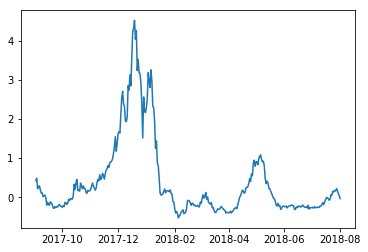

In [8]:
df[coins].mean(axis=1).plot()

In [26]:
for x in ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']:
    month_later = df[x][datetime.date(2017, 8, 30)]
    
    if not numpy.isnan(a):
        coins_with_interests.append((x, df[x][datetime.date(2017, 8, 30)]))
print(coins_with_interests)

[('ETH', 0.8564771668219944), ('BTC', 0.587742666954169), ('XRP', 0.36215693068715415), ('BCH', 0.9534401956123075), ('EOS', -0.2931034482758621), ('XLM', 0.3186703945324634), ('LTC', 0.4916317991631798), ('MIOTA', 2.413968406011023), ('USDT', 0.0), ('ETH', 0.6891123164439741), ('BTC', 0.7302943794927637), ('XRP', 0.44380496235590505), ('BCH', 0.5477750585510908), ('EOS', -0.2696629213483146), ('XLM', 0.24937266491942234), ('LTC', 0.651022304832714), ('ADA', nan), ('MIOTA', 1.9027082902625594), ('USDT', 0.0031911510514948116), ('ETH', 0.8564771668219944), ('BTC', 0.587742666954169), ('XRP', 0.36215693068715415), ('BCH', 0.9534401956123075), ('EOS', -0.2931034482758621), ('XLM', 0.3186703945324634), ('LTC', 0.4916317991631798), ('ADA', nan), ('MIOTA', 2.413968406011023), ('USDT', 0.0)]


In [27]:
def getKey(row):
    return row[1] 

sorted(coins_with_interests, key=getKey, reverse=True)



[('MIOTA', 2.413968406011023),
 ('ADA', nan),
 ('MIOTA', 1.9027082902625594),
 ('BCH', 0.9534401956123075),
 ('BCH', 0.9534401956123075),
 ('ETH', 0.8564771668219944),
 ('ETH', 0.8564771668219944),
 ('BTC', 0.7302943794927637),
 ('ETH', 0.6891123164439741),
 ('LTC', 0.651022304832714),
 ('BTC', 0.587742666954169),
 ('BTC', 0.587742666954169),
 ('BCH', 0.5477750585510908),
 ('LTC', 0.4916317991631798),
 ('LTC', 0.4916317991631798),
 ('XRP', 0.44380496235590505),
 ('XRP', 0.36215693068715415),
 ('XRP', 0.36215693068715415),
 ('XLM', 0.3186703945324634),
 ('XLM', 0.3186703945324634),
 ('XLM', 0.24937266491942234),
 ('USDT', 0.0031911510514948116),
 ('USDT', 0.0),
 ('EOS', -0.2696629213483146),
 ('EOS', -0.2931034482758621),
 ('EOS', -0.2931034482758621),
 ('ADA', nan),
 ('MIOTA', 2.413968406011023),
 ('USDT', 0.0)]

In [45]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)
# print(df['ETH'])

ms = 1.0
for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
    coins_with_interests = []
    for x in coins:
        if not key_day in df[x].keys():
            print(f"{x} coin does not have a record at {d.date()}.")
            continue
        a = df[x][d.date()]
        if not numpy.isnan(a):
            coins_with_interests.append((x, df[x][d.date()]))
    ranked_coins = [k for (k, v) in sorted(coins_with_interests, key=lambda row: row[1], reverse=True) if not numpy.isnan(v)][:3]
    m = ms / 3
    
    

2017-08-31 21:30:54.645670 ['MIOTA', 'BTC', 'ETH']
2017-09-30 21:30:54.645670 ['USDT', 'BTC', 'ETH']
2017-10-31 21:30:54.645670 ['XLM', 'BTC', 'ADA']
2017-11-30 21:30:54.645670 ['ADA', 'EOS', 'MIOTA']
2017-12-31 21:30:54.645670 ['XRP', 'ADA', 'XLM']
2018-01-31 21:30:54.645670 ['ETH', 'EOS', 'XLM']
2018-02-28 21:30:54.645670 ['LTC', 'USDT', 'BTC']
2018-03-31 21:30:54.645670 ['USDT', 'EOS', 'BTC']
2018-04-30 21:30:54.645670 ['EOS', 'ADA', 'XLM']
2018-05-31 21:30:54.645670 ['USDT', 'MIOTA', 'ETH']
2018-06-30 21:30:54.645670 ['USDT', 'BTC', 'ETH']
2018-07-31 21:30:54.645670 ['XLM', 'BTC', 'BCH']


In [106]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)
# print(df['ETH'])

for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
    coins_with_interests = []
    for x in coins:
        if not key_day in df[x].keys():
            print(f"{x} coin does not have a record at {d.date()}.")
            continue
        a = df[x][d.date()]
        if not numpy.isnan(a):
            coins_with_interests.append((x, df[x][d.date()]))
    ranked_coins = [k for (k, v) in sorted(coins_with_interests, key=lambda row: row[1], reverse=True) if not numpy.isnan(v)]
    cs = [coin_dict[ranked_coins[0]], coin_dict[ranked_coins[1]], coin_dict[ranked_coins[2]]]
    
    start_date = d.date()
    end_date = (start_date + pandas.tseries.offsets.MonthEnd(1)).date()
    
    while start_date in cs[0].keys() and start_date < end_date:
        print(start_date, cs[0][start_date], d.date())
        if d.date() == start_date:
            print("Y")
        start_date = (start_date + datetime.timedelta(days=1))
    

2017-08-31 1.9027082902625594 2017-08-31
Y
2017-09-01 1.823253505571167 2017-08-31
2017-09-02 1.092802209705373 2017-08-31
2017-09-03 0.9013407073087203 2017-08-31
2017-09-04 0.38847982744252163 2017-08-31
2017-09-05 0.42200249569747306 2017-08-31
2017-09-06 0.5627874928620644 2017-08-31
2017-09-07 0.1791716045482683 2017-08-31
2017-09-08 -0.00525097178868017 2017-08-31
2017-09-09 -0.009969000240089176 2017-08-31
2017-09-10 -0.24320019790126923 2017-08-31
2017-09-11 -0.22627038189415627 2017-08-31
2017-09-12 -0.26712953734804323 2017-08-31
2017-09-13 -0.42972376188544914 2017-08-31
2017-09-14 -0.5152029143231269 2017-08-31
2017-09-15 -0.5423714285714286 2017-08-31
2017-09-16 -0.522314705882353 2017-08-31
2017-09-17 -0.4287792752259101 2017-08-31
2017-09-18 -0.38045989815241565 2017-08-31
2017-09-19 -0.400164507723903 2017-08-31
2017-09-20 -0.37476952207346825 2017-08-31
2017-09-21 -0.40656691653580646 2017-08-31
2017-09-22 -0.4049538377955034 2017-08-31
2017-09-23 -0.3947096472911995 2

In [75]:
# for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
#     print((d + pandas.tseries.offsets.MonthEnd(1) - datetime.timedelta(days=1)).date())

2017-09-29
2017-10-30
2017-11-29
2017-12-30
2018-01-30
2018-02-27
2018-03-30
2018-04-29
2018-05-30
2018-06-29
2018-07-30
2018-08-30


In [92]:
# start_date = datetime.datetime(2017,8,1).date()
# end_date = (start_date + pandas.tseries.offsets.MonthEnd(1)).date()
# while start_date < end_date:
#     print(start_date)
#     start_date = (start_date + datetime.timedelta(days=1))

2017-08-01
2017-08-02
2017-08-03
2017-08-04
2017-08-05
2017-08-06
2017-08-07
2017-08-08
2017-08-09
2017-08-10
2017-08-11
2017-08-12
2017-08-13
2017-08-14
2017-08-15
2017-08-16
2017-08-17
2017-08-18
2017-08-19
2017-08-20
2017-08-21
2017-08-22
2017-08-23
2017-08-24
2017-08-25
2017-08-26
2017-08-27
2017-08-28
2017-08-29
2017-08-30
